In [138]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%config InLineBackend.figure_format = 'KKX'
%matplotlib inline

In [139]:
data = pd.read_csv('RESULT 2.csv') 
data

,year,value,gdp
0,2540.01,24.73,63.70
1,2540.02,24.33,63.70
2,2540.03,25.46,63.70
3,2540.04,23.38,63.70
4,2540.05,23.41,63.70
...,...,...,...
278,2563.03,36.79,101.36
279,2563.04,33.59,101.36
280,2563.05,35.22,101.36
281,2563.06,36.96,101.36


In [140]:
data.info()
cols=['year','value','gdp']
mul=['gdp','year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    283 non-null    float64
 1   value   283 non-null    float64
 2   gdp     283 non-null    float64
dtypes: float64(3)
memory usage: 6.7 KB


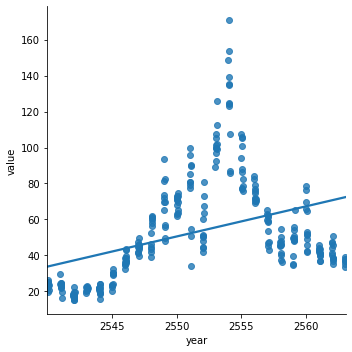

In [141]:
sns.lmplot(x='year',y='value',data=data, ci=None,)
scatter_kws={'alpha':0.4}
line_kws={'color':'orange'}

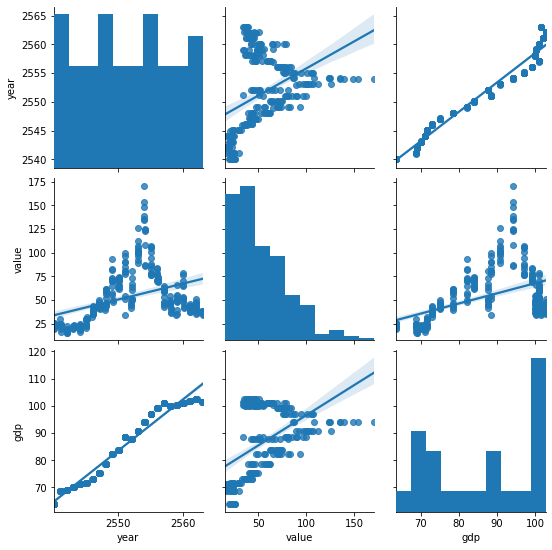

In [142]:

sns.pairplot(data, kind='reg')

In [143]:
model = LinearRegression()
model

LinearRegression()

In [144]:
len(data)

283

In [145]:
data.columns

Index(['year', 'value', 'gdp'], dtype='object')

In [146]:
train_x=data.drop(columns=['value'])#ลบ value ออกจาก แกน x
train_y=data['value']#ให้ แกน y เป็น value

In [147]:
len(data)

283

In [148]:
train_y.head()

0    24.73
1    24.33
2    25.46
3    23.38
4    23.41
Name: value, dtype: float64

In [149]:
train_x.head() 

,year,gdp
0,2540.01,63.7
1,2540.02,63.7
2,2540.03,63.7
3,2540.04,63.7
4,2540.05,63.7


In [150]:
model.fit(train_x,train_y)

LinearRegression()

In [151]:
model.score(train_x,train_y)#อันนี้ปะที่ใช้หา R2_score

0.4156532787858641

In [152]:
model.intercept_

22928.59446893543

In [153]:
model.coef_


array([-9.16054416,  5.76430622])

In [154]:
model.predict([[2540.01,63.7]])
           

array([27.9069974])

In [155]:
x_test=data.drop(columns=['value'])[50:]
x_test.head()

,year,gdp
50,2544.03,71.2
51,2544.04,71.2
52,2544.05,71.2
53,2544.06,71.2
54,2544.07,71.2


In [156]:

y_hat=model.predict(x_test)
y_hat

array([34.31390655, 34.22230111, 34.13069567, 34.03909022, 33.94748478,
       33.85587934, 33.7642739 , 33.67266846, 33.58106302, 33.48945758,
       28.21872638, 28.12712094, 28.0355155 , 27.94391006, 27.85230462,
       27.76069917, 27.66909373, 27.57748829, 27.48588285, 27.39427741,
       27.30267197, 27.21106653, 26.55178031, 26.46017487, 26.36856943,
       26.27696399, 26.18535855, 26.0937531 , 26.00214766, 25.91054222,
       25.81893678, 25.72733134, 25.6357259 , 25.54412046, 29.49627922,
       29.40467378, 29.31306834, 29.2214629 , 29.12985746, 29.03825201,
       28.94664657, 28.85504113, 28.76343569, 28.67183025, 28.58022481,
       28.48861937, 39.3579456 , 39.26634016, 39.17473472, 39.08312928,
       38.99152384, 38.89991839, 38.80831295, 38.71670751, 38.62510207,
       38.53349663, 38.44189119, 38.35028574, 51.52533447, 51.43372903,
       51.34212359, 51.25051815, 51.15891271, 51.06730726, 50.97570182,
       50.88409638, 50.79249094, 50.7008855 , 50.60928006, 50.51

In [157]:
dc=pd.concat([data[50:].reset_index(),pd.Series(y_hat, name='predicted')], axis='columns')
dc

,index,year,value,gdp,predicted
0,50,2544.03,20.72,71.20,34.313907
1,51,2544.04,22.01,71.20,34.222301
2,52,2544.05,23.82,71.20,34.130696
3,53,2544.06,24.34,71.20,34.039090
4,54,2544.07,22.60,71.20,33.947485
...,...,...,...,...,...
228,278,2563.03,36.79,101.36,34.115043
229,279,2563.04,33.59,101.36,34.023438
230,280,2563.05,35.22,101.36,33.931832
231,281,2563.06,36.96,101.36,33.840227
